## Introduction to Multiple Linear Regression

Multiple linear regression is a statistical method used to model the relationship between one dependent variable and multiple independent variables. Unlike simple linear regression, it includes several predictors, aiming to capture complex patterns in data and improve the accuracy of predictions.


## Importing Libraries

Here, we import essential libraries for data manipulation, numerical analysis, and visualization, which are fundamental for conducting and interpreting multiple linear regression.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
import plotly.graph_objs as go

## Loading and Previewing Data

In this section, we load our dataset to examine its initial structure and familiarize ourselves with the data we'll be analyzing for our multiple linear regression model.


In [35]:
df=pd.read_csv("Co2.csv")
df.head(10)

MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   
5       2014  ACURA         RLX     MID-SIZE         3.5          6   
6       2014  ACURA          TL     MID-SIZE         3.5          6   
7       2014  ACURA      TL AWD     MID-SIZE         3.7          6   
8       2014  ACURA      TL AWD     MID-SIZE         3.7          6   
9       2014  ACURA         TSX      COMPACT         2.4          4   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   
5          AS6        Z                  11.9                  7.7   
6          AS6        Z                  11.8                  8.1   
7          AS6        Z                  12.8                  9.0   
8           M6        Z                  13.4                  9.5   
9          AS5        Z                  10.6                  7.5   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   9.6                        29           221  
2                   5.9                        48           136  
3                  11.1                        25           255  
4                  10.6                        27           244  
5                  10.0                        28           230  
6                  10.1                        28           232  
7                  11.1                        25           255  
8                  11.6                        24           267  
9                   9.2                        31           212

## Checking for Missing Values

Here, we assess the dataset for any missing values, which is an essential step before modeling. Identifying null values helps ensure data quality and informs whether further data cleaning or imputation is needed.


In [36]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

## Displaying Column Names

In this step, we list the names of all columns in the DataFrame. This provides an overview of the features available for our analysis and helps us understand the data's context before proceeding with any modeling.


In [37]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

## Exploring Unique Values in 'MODELYEAR'

We retrieve the unique values in the **'MODELYEAR'** column to understand the range of model years present in our dataset. This exploration helps us identify the years of the data and assess the diversity or trends related to vehicle models over time.


In [38]:
df['MODELYEAR'].unique()

array([2014], dtype=int64)

## Dropping the 'MODELYEAR' Column

We remove the **'MODELYEAR'** column from the DataFrame as it may not significantly contribute to our multiple linear regression analysis. Eliminating irrelevant features can enhance model performance and interpretability.


In [34]:
df=df.drop("MODELYEAR",axis=1)

KeyError: "['MODELYEAR'] not found in axis"

In [39]:
df['MAKE'].unique()

array(['ACURA', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW', 'BUICK',
       'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT', 'FORD',
       'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP', 'KIA',
       'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO'], dtype=object)

In [40]:
df['VEHICLECLASS'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'MINICOMPACT', 'SUBCOMPACT',
       'TWO-SEATER', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [41]:
df['MODEL'].unique()

array(['ILX', 'ILX HYBRID', 'MDX 4WD', 'RDX AWD', 'RLX', 'TL', 'TL AWD',
       'TSX', 'DB9', 'RAPIDE', 'V8 VANTAGE', 'V8 VANTAGE S', 'VANQUISH',
       'A4', 'A4 QUATTRO', 'A5 CABRIOLET QUATTRO', 'A5 QUATTRO',
       'A6 QUATTRO', 'A6 QUATTRO TDI CLEAN DIESEL', 'A7 QUATTRO',
       'A7 QUATTRO TDI CLEAN DIESEL', 'A8', 'A8 TDI CLEAN DIESEL', 'A8L',
       'A8L TDI CLEAN DIESEL', 'ALLROAD QUATTRO', 'Q5', 'Q5 HYBRID',
       'Q5 TDI CLEAN DIESEL', 'Q7', 'Q7 TDI CLEAN DIESEL', 'R8',
       'R8 SPYDER', 'RS5', 'RS5 CABRIOLET', 'RS7', 'S4', 'S5',
       'S5 CABRIOLET', 'S6', 'S7', 'S8', 'SQ5', 'TT COUPE QUATTRO',
       'TT ROADSTER QUATTRO', 'TTS COUPE QUATTRO', 'TTS ROADSTER QUATTRO',
       'CONTINENTAL GT', 'CONTINENTAL GT CONVERTIBLE',
       'CONTINENTAL GT SPEED CONVERTIBLE', 'CONTINENTAL GTC',
       'FLYING SPUR', 'MULSANNE', '320i', '320i xDRIVE', '328d xDRIVE',
       '328d xDRIVE TOURING', '328i', '328i xDRIVE',
       '328i xDRIVE GRAN TURISMO', '328i xDRIVE TOURING', '335i',
 

In [10]:
df=df.drop("MODEL",axis=1)

In [11]:
df['TRANSMISSION'].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'A6', 'AM7', 'AV8', 'AS8', 'A7', 'A8',
       'M7', 'A4', 'M5', 'AV', 'A5', 'AM6', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5'], dtype=object)

In [12]:
df.columns

Index(['MAKE', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS', 'TRANSMISSION',
       'FUELTYPE', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY',
       'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

## Creating a Subset DataFrame Based on Feature Diversity

Based on the diversity observed in each feature (X), we have decided to create a subset DataFrame named **`cdf`**. This subset includes the most relevant variables for our analysis: **'ENGINESIZE'**, **'CYLINDERS'**, **'FUELTYPE'**, **'FUELCONSUMPTION_CITY'**, **'FUELCONSUMPTION_HWY'**, **'FUELCONSUMPTION_COMB'**, **'FUELCONSUMPTION_COMB_MPG'**, and **'CO2EMISSIONS'**. This focused approach will help streamline our modeling process.


In [13]:
cdf=df[['ENGINESIZE', 'CYLINDERS',
        'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']]

## Encoding Categorical Variables

To prepare the data for analysis, we map categorical values in the **'FUELTYPE'** column to numerical representations using a **label mapping**. The mapping converts each fuel type ('E', 'X', 'D', 'Z') to a corresponding integer (0, 1, 2, 3). This encoding facilitates the use of these categorical variables in our multiple linear regression model, ensuring that they can be processed mathematically.


In [14]:
label_mapping = {
    'E': 0,
    'X': 1,
    'D': 2,
    "Z":3
}
cdf.loc[:, 'FUELTYPE'] = cdf['FUELTYPE'].map(label_mapping)

## Analyzing Correlation with CO2 Emissions

We calculate the correlation matrix of our dataset to understand the relationships between variables, particularly focusing on **'CO2EMISSIONS'**. By using the **`corr()`** method, we can identify which features are positively or negatively correlated with CO2 emissions. This analysis helps us to prioritize which features to consider in our regression model, guiding us towards the most influential predictors.


In [15]:
corr=cdf.corr()
print(corr['CO2EMISSIONS'].sort_values(ascending=False))

CO2EMISSIONS                1.000000
FUELCONSUMPTION_CITY        0.898039
FUELCONSUMPTION_COMB        0.892129
ENGINESIZE                  0.874154
FUELCONSUMPTION_HWY         0.861748
CYLINDERS                   0.849685
FUELTYPE                    0.091596
FUELCONSUMPTION_COMB_MPG   -0.906394
Name: CO2EMISSIONS, dtype: float64


## Visualizing Correlation with a Heatmap

To further understand the relationships between our variables, we create a heatmap using **Seaborn**. This visualization allows us to see the correlation coefficients between **'CO2EMISSIONS'** and other features at a glance. The **`annot=True`** parameter displays the correlation values directly on the heatmap, while the **`cmap='coolwarm'`** provides a color gradient that helps differentiate between positive and negative correlations. This visual aid is crucial for quickly identifying strong correlations that may influence our multiple linear regression model.


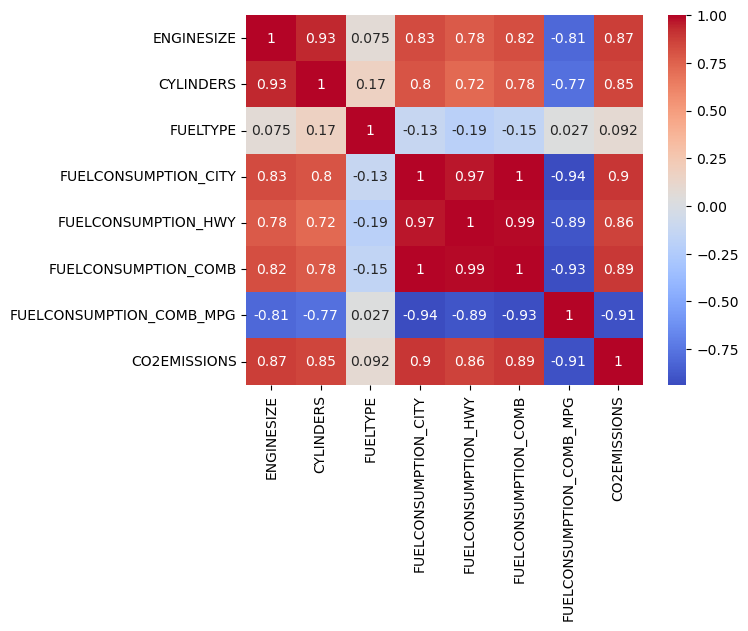

In [42]:
sns.heatmap(cdf.corr(), annot = True, cmap = 'coolwarm')
plt.show()

## Scatter Plots of Features vs. CO2 Emissions

In this section, we create scatter plots to visualize the relationships between each feature in our dataset and the target variable, **'CO2EMISSIONS'**. Using **Seaborn's** **`scatterplot`**, we display each feature on the x-axis while keeping **'CO2EMISSIONS'** on the y-axis.

The layout consists of 2 rows and 4 columns, allowing us to visualize multiple relationships simultaneously. These scatter plots help us identify trends, patterns, and potential correlations, which are essential for our multiple linear regression analysis.


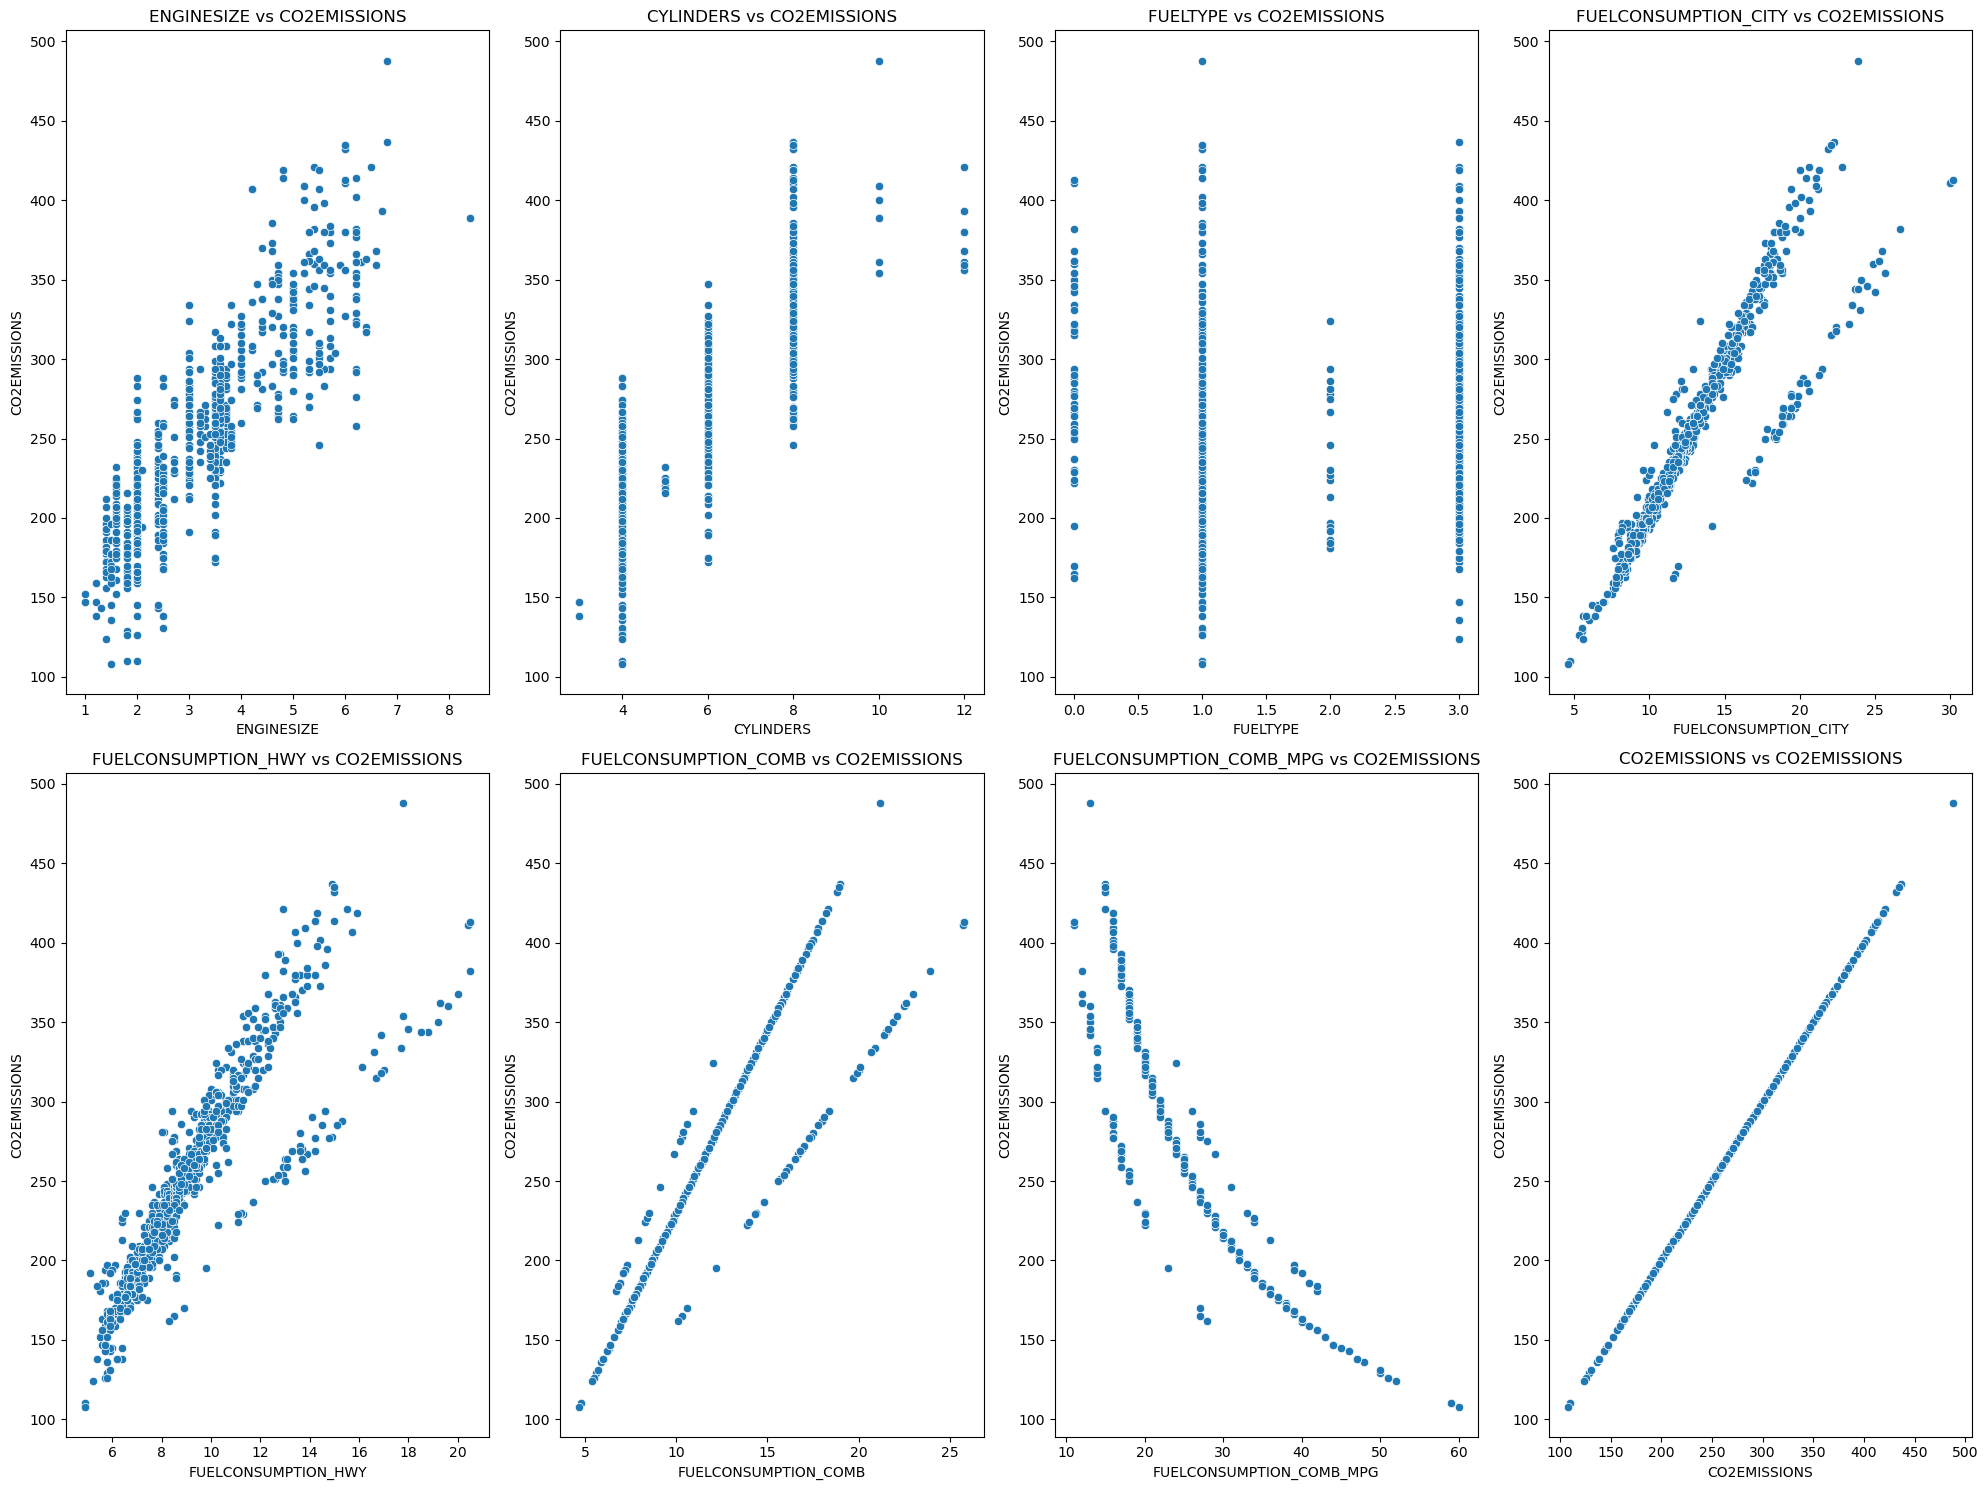

In [17]:
rows,cols=2,4
plt.figure(figsize=(20,15))
for i, col in enumerate([c for c in cdf.columns if c != "quality"]):
    plt.subplot(rows, cols, i + 1)
    sns.scatterplot(data=cdf, x=col, y='CO2EMISSIONS')
    plt.title(f'{col} vs CO2EMISSIONS')

plt.tight_layout()
plt.show()

## Defining Features and Target Variable

In this step, we define our feature set \( X \) and target variable \( y \). The feature set \( X \) includes three variables: `ENGINESIZE`, `CYLINDERS`, and `FUELCONSUMPTION_HWY`, which are expected to influence CO2 emissions. The target variable \( y \) is `CO2EMISSIONS`, representing the output we aim to predict based on the features. This separation is essential for building our regression model.


In [18]:
X=cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_HWY']]
y=cdf['CO2EMISSIONS']

## Data Splitting

In this section, we split the dataset into training and testing sets to evaluate the performance of our model. While we primarily used the `train_test_split` function from the `sklearn` library for this purpose, we also created an alternative method using a boolean mask for random splitting. Both approaches are effective for preparing our data, and we can choose based on our specific requirements.


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [45]:
'''
msk=np.random.rand(len(df))<0.8
train=cdf[msk]
test=cdf[~msk]
X_train=train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_HWY']]
y_train=train[['CO2EMISSIONS']]
X_test=train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_HWY']]
y_test=train[['CO2EMISSIONS']]
'''

"\nmsk=np.random.rand(len(df))<0.8\ntrain=cdf[msk]\ntest=cdf[~msk]\nX_train=train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_HWY']]\ny_train=train[['CO2EMISSIONS']]\nX_test=train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_HWY']]\ny_test=train[['CO2EMISSIONS']]\n"

In [20]:
X_train.shape

(853, 3)

In [21]:
y_train.shape

(853,)

## Training Set Features vs. Target (CO2 Emissions)

This plot visualizes the training set features against `CO2EMISSIONS`, providing insight into how each feature relates to emissions in the training data:

- **Blue** points represent `ENGINESIZE`.
- **Red** points represent `CYLINDERS`.
- **Green** points represent `FUELCONSUMPTION_HWY`.

These distinctions help us observe trends and understand feature impact on emissions before modeling, offering an initial view of the data’s spread and relationships.


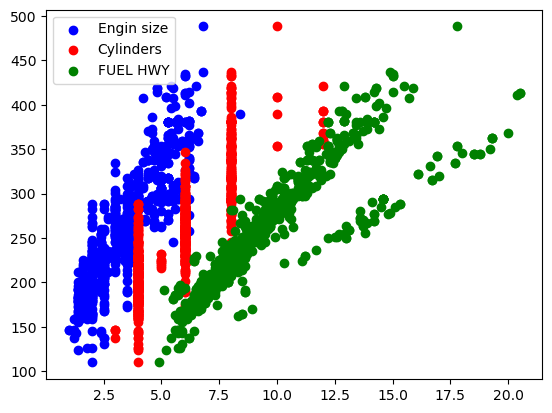

In [22]:
fig=plt.figure()
ax1=fig.add_subplot(111)


ax1.scatter(X_train.ENGINESIZE, y_train, color='blue',label="Engin size")

ax1.scatter(X_train.CYLINDERS, y_train, color='red',label="Cylinders")

ax1.scatter(X_train.FUELCONSUMPTION_HWY, y_train, color='green',label="FUEL HWY")


plt.legend()

## Test Set Features vs. Target (CO2 Emissions)

This plot displays the relationship between the test set features (`ENGINESIZE`, `CYLINDERS`, and `FUELCONSUMPTION_HWY`) and `CO2EMISSIONS`:

- **Pink** for `ENGINESIZE` (Test)
- **Yellow** for `CYLINDERS` (Test)
- **Black** for `FUELCONSUMPTION_HWY` (Test)

The use of different colors makes it easy to distinguish each feature and examine how they individually relate to CO2 emissions within the test data. This comparison with the training set can help evaluate the model's performance on unseen data.


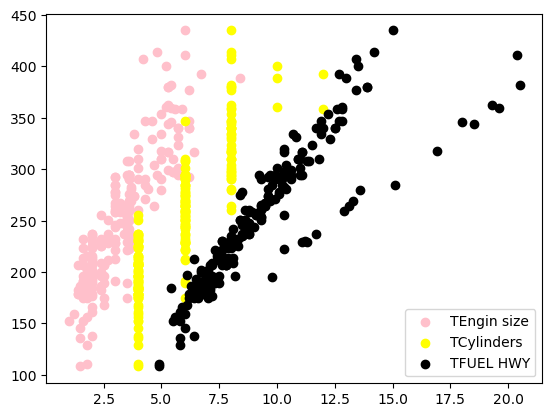

In [23]:
fig=plt.figure()
ax1=fig.add_subplot(111)

ax1.scatter(X_test.ENGINESIZE, y_test, color='pink',label="TEngin size")

ax1.scatter(X_test.CYLINDERS, y_test, color='yellow',label="TCylinders")

ax1.scatter(X_test.FUELCONSUMPTION_HWY, y_test, color='black',label="TFUEL HWY")


plt.legend()

## Feature Comparison in Training and Test Sets

This figure displays the relationships between each feature and `CO2EMISSIONS` in the training and test sets, providing a side-by-side comparison:

- **Left Plot (Training Set):** 
  - `ENGINESIZE` in blue, `CYLINDERS` in red, and `FUELCONSUMPTION_HWY` in green.
  
- **Right Plot (Test Set):**
  - `ENGINESIZE` in pink, `CYLINDERS` in yellow, and `FUELCONSUMPTION_HWY` in black.

This comparison helps us visualize the consistency of feature relationships across both sets, aiding in the analysis of model generalizability.


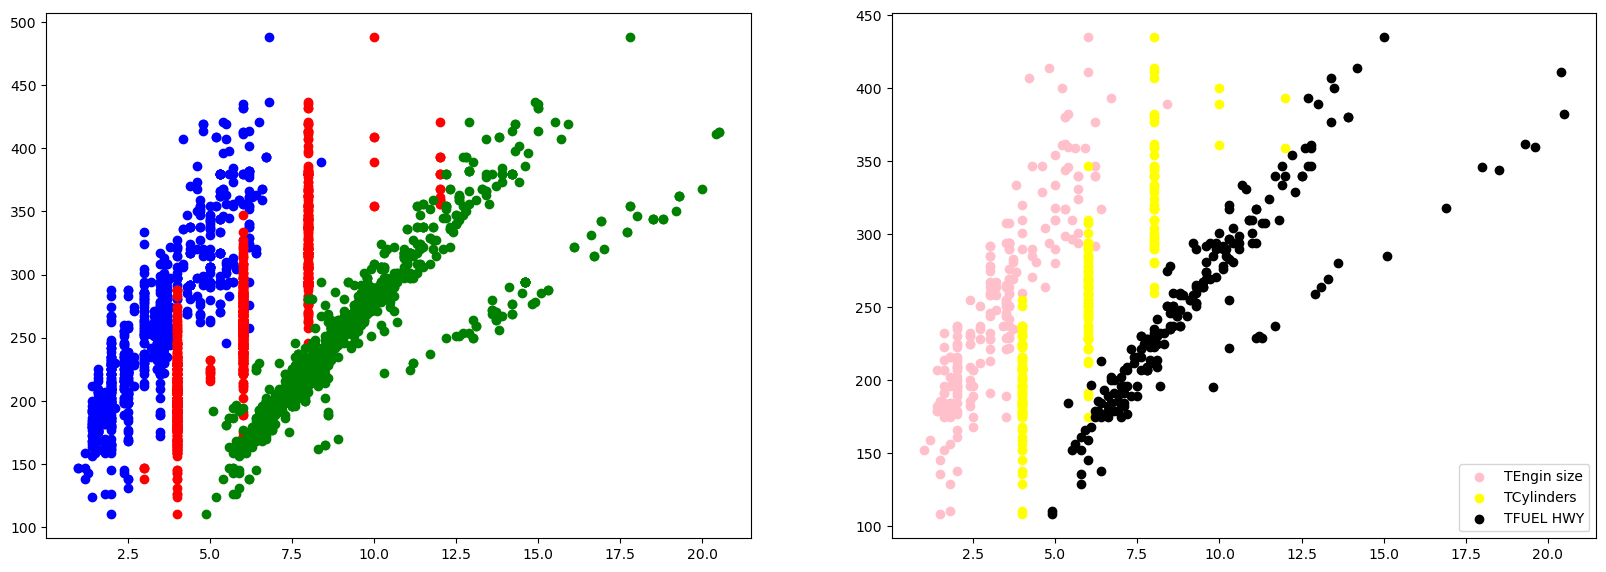

In [24]:
fig=plt.figure(figsize=(20,15))
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)

ax1.scatter(X_train.ENGINESIZE, y_train, color='blue',label="Engin size")

ax1.scatter(X_train.CYLINDERS, y_train, color='red',label="Cylinders")

ax1.scatter(X_train.FUELCONSUMPTION_HWY, y_train, color='green',label="FUEL HWY")


ax2.scatter(X_test.ENGINESIZE, y_test, color='pink',label="TEngin size")

ax2.scatter(X_test.CYLINDERS, y_test, color='yellow',label="TCylinders")

ax2.scatter(X_test.FUELCONSUMPTION_HWY, y_test, color='black',label="TFUEL HWY")



plt.legend()

## Training the Multiple Linear Regression Model

We use `LinearRegression` from `sklearn` to fit a multiple linear regression model on the training data (`X_train`, `y_train`). This model learns the relationship between features such as `ENGINESIZE`, `CYLINDERS`, and `FUELCONSUMPTION_HWY` with `CO2EMISSIONS`. Once trained, the model can be used to make predictions on new data based on these relationships.


In [25]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

## Model Coefficients and Intercept

The coefficients and intercept of the regression model provide insights into the influence of each feature on `CO2EMISSIONS`.

- **Coefficients (`coef_`)**: These values represent the impact of each feature (e.g., `ENGINESIZE`, `CYLINDERS`, `FUELCONSUMPTION_HWY`) on the target variable. A positive coefficient indicates a direct relationship, while a negative one implies an inverse relationship.
- **Intercept (`intercept_`)**: The intercept represents the baseline `CO2EMISSIONS` when all feature values are zero.

These values can help us interpret the effect of each feature on `CO2EMISSIONS`.


In [26]:
print("regr coef : ",reg.coef_)
print("regr intercept : ", reg.intercept_)

regr coef :  [12.0462219   9.1559944  10.39406873]
regr intercept :  64.7760522910254


### Understanding Predicted Lines for Multiple Linear Regression Model

In this section, we use the trained multiple linear regression model to predict `CO2EMISSIONS` based on three features: `ENGINESIZE`, `CYLINDERS`, and `FUELCONSUMPTION_HWY`. We create three lines (`line1`, `line2`, `line3`) to examine the influence of each feature individually by holding the others at their average values.

1. **`line1`**: Calculates predicted `CO2EMISSIONS` while varying `ENGINESIZE` and holding `CYLINDERS` and `FUELCONSUMPTION_HWY` at their mean values. This helps us observe the direct effect of `ENGINESIZE` changes on emissions.

2. **`line2`**: Computes predicted emissions while varying `CYLINDERS` and keeping `ENGINESIZE` and `FUELCONSUMPTION_HWY` constant at their averages. This isolates the impact of `CYLINDERS` on emissions.

3. **`line3`**: Holds `ENGINESIZE` and `CYLINDERS` constant and varies `FUELCONSUMPTION_HWY` to see its isolated effect on `CO2EMISSIONS`.

By using these lines, we can interpret the relative influence of each feature on `CO2EMISSIONS`. For instance, larger coefficients indicate stronger relationships between a feature and emissions, allowing us to understand which factors have a greater impact on `CO2EMISSIONS` predictions. This analysis is particularly useful in understanding how changes in each factor contribute individually to the overall emissions output, providing valuable insights for decision-making.


In [27]:
line1=(reg.intercept_ +12.0462219*(X_train.ENGINESIZE)+9.1559944*np.mean(X_train.CYLINDERS) + 10.39406873*np.mean(X_train.FUELCONSUMPTION_HWY)   )
line2=(reg.intercept_ +12.0462219*np.mean(X_train.ENGINESIZE)+9.1559944*(X_train.CYLINDERS) + 10.39406873*np.mean(X_train.FUELCONSUMPTION_HWY)   )
line3=(reg.intercept_ +12.0462219*np.mean(X_train.ENGINESIZE)+9.1559944*np.mean(X_train.CYLINDERS) + 10.39406873*(X_train.FUELCONSUMPTION_HWY)   )

### Visualizing Relationships with Multiple Linear Regression

In this section, we create a figure with multiple subplots to visualize the relationships between various independent variables and the target variable, **CO2 Emissions**. 

- **Subplot 1 (ax1)**: Displays a scatter plot of **Engine Size**, **Cylinders**, and **Fuel Consumption (HWY)** against the target variable **CO2 Emissions**. The red line represents the predicted emissions based on the model using **Engine Size**.
  
- **Subplot 2 (ax2)**: Similar to the first subplot but focuses on the relationship with **Cylinders**. The red line shows predicted emissions based on **Cylinders**.
  
- **Subplot 3 (ax3)**: Displays the scatter plot for **Fuel Consumption (HWY)** with the model's predictions.

These visualizations help assess how well our model fits the data and highlight the impact of each variable on CO2 emissions.


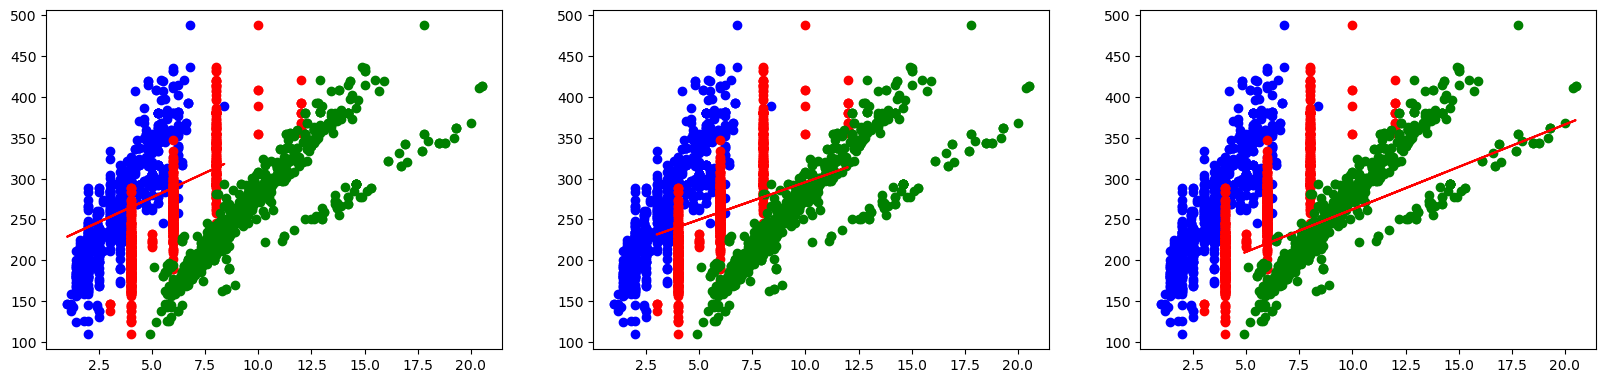

In [28]:
fig=plt.figure(figsize=(20,15))
ax1=fig.add_subplot(331)
ax2=fig.add_subplot(332)
ax3=fig.add_subplot(333)

ax1.scatter(X_train.ENGINESIZE, y_train, color='blue', label="Engine Size")
ax1.scatter(X_train.CYLINDERS, y_train, color='red', label="Cylinders")
ax1.scatter(X_train.FUELCONSUMPTION_HWY, y_train, color='green', label="Fuel Consumption HWY")

ax1.plot(X_train.ENGINESIZE, line1, '-r')


ax2.scatter(X_train.ENGINESIZE, y_train, color='blue', label="Engine Size")
ax2.scatter(X_train.CYLINDERS, y_train, color='red', label="Cylinders")
ax2.scatter(X_train.FUELCONSUMPTION_HWY, y_train, color='green', label="Fuel Consumption HWY")

ax2.plot(X_train.CYLINDERS, line2, '-r')

ax3.scatter(X_train.ENGINESIZE, y_train, color='blue', label="Engine Size")
ax3.scatter(X_train.CYLINDERS, y_train, color='red', label="Cylinders")
ax3.scatter(X_train.FUELCONSUMPTION_HWY, y_train, color='green', label="Fuel Consumption HWY")

ax3.plot(X_train.FUELCONSUMPTION_HWY, line3, '-r')

### Predictions and Evaluation

After training our linear regression model, we use it to make predictions on the test set. We evaluate the model's performance using the following metrics:

1. **Residual Sum of Squares (RSS)**:
   - This metric measures the sum of the squared differences between the predicted values and the actual values. 
 
   - **Interpretation**: A lower RSS value indicates a better fit of the model to the data, as it means the predictions are closer to the actual values.

2. **R² Score (Coefficient of Determination)**:
   - The R² score indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.

   - **Interpretation**: R² ranges from 0 to 1, where a score closer to 1 indicates that a larger proportion of the variance is explained by the model. A higher R² score is preferred, as it means the model has better explanatory power.

3. **Mean Absolute Error (MAE)**:
   - MAE represents the average absolute difference between the predicted values and the actual values.

   - **Interpretation**: A lower MAE value indicates a better model, as it means the average error in predictions is smaller. 

In summary, for all three metrics:
- **Lower values** of Residual Sum of Squares and Mean Absolute Error are better.
- **Higher values** of R² Score are better.


In [29]:
y_pred=reg.predict(X_test)
print("Residual sum of squares: %.2f"
      % np.mean((y_pred - y_test) ** 2))
#  (R² Score)
variance_score = r2_score(y_test, y_pred)
# Explained variance score: 1 is perfect prediction
print('Variance score: ' , variance_score)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))

Residual sum of squares: 561.59
Variance score:  0.8641848942539714
Mean absolute error: 17.53


In [30]:
ine1=(reg.intercept_ +12.0462219*(X_train.ENGINESIZE)+9.1559944*np.mean(X_train.CYLINDERS) + 10.39406873*np.mean(X_train.FUELCONSUMPTION_HWY)   )
line2=(reg.intercept_ +12.0462219*np.mean(X_train.ENGINESIZE)+9.1559944*(X_train.CYLINDERS) + 10.39406873*np.mean(X_train.FUELCONSUMPTION_HWY)   )
line3=(reg.intercept_ +12.0462219*np.mean(X_train.ENGINESIZE)+9.1559944*np.mean(X_train.CYLINDERS) + 10.39406873*(X_train.FUELCONSUMPTION_HWY)   )

### 3D Scatter Plot of CO2 Emissions: Actual vs Predicted

In this section, we visualize the relationship between the actual and predicted CO2 emissions using a 3D scatter plot. This allows us to better understand how well our regression model performs.

1. **Data Preparation**:
   - We predict CO2 emissions for the test dataset using the trained linear regression model: `y_pred = reg.predict(X_test)`.
  
2. **Actual CO2 Emissions**:
   - We create a trace for the actual CO2 emissions using the training dataset. The `trace_actual` represents the actual values:
     - **X-axis**: Fuel consumption on the highway (`FUELCONSUMPTION_HWY`).
     - **Y-axis**: Number of cylinders (`CYLINDERS`).
     - **Z-axis**: Actual CO2 emissions (`y_train`).
     - This trace is plotted with blue markers for better visualization.

3. **Predicted CO2 Emissions**:
   - A second trace is created for the predicted CO2 emissions using the test dataset. The `trace_predicted` represents the predicted values:
     - **X-axis**: Fuel consumption on the highway (`FUELCONSUMPTION_HWY`).
     - **Y-axis**: Number of cylinders (`CYLINDERS`).
     - **Z-axis**: Predicted CO2 emissions (`y_pred`).
     - This trace is plotted with red markers.

4. **Layout Settings**:
   - We define the layout of the plot, including the title and axis labels for clarity.

5. **Visualization**:
   - Finally, we combine the two traces and render the 3D scatter plot using Plotly. The resulting plot provides insight into how well our model predicts CO2 emissions based on fuel consumption and the number of cylinders.

This visualization helps us identify how closely the predicted values match the actual CO2 emissions and whether there are any significant discrepancies.


In [31]:
import plotly.graph_objs as go
y_pred=reg.predict(X_test)

trace_actual = go.Scatter3d(
    x=X_train['FUELCONSUMPTION_HWY'],
    y=X_train['CYLINDERS'],
    z=y_train,  
    mode='markers',
    marker=dict(
        size=5,
        color='blue',  
        opacity=0.8
    ),
    name='Actual CO2'
)

trace_predicted = go.Scatter3d(
    x=X_test['FUELCONSUMPTION_HWY'],
    y=X_test['CYLINDERS'],
    z=y_pred,  C
    mode='markers',
    marker=dict(
        size=5,
        color='red', 
        opacity=0.8
    ),
    name='Predicted CO2'
)

layout = go.Layout(
    title="3D Scatter Plot of CO2 Emissions: Actual vs Predicted",
    scene=dict(
        xaxis_title='FUELCONSUMPTION_HWY',
        yaxis_title='CYLINDERS)',
        zaxis_title='CO2 Emissions'
    )
)

fig = go.Figure(data=[trace_actual, trace_predicted], layout=layout)
fig.show()


### Differences Between the Concise Version and the Previous Version of the Explanation

1. **Brevity**: The concise version presents key aspects more clearly and succinctly, avoiding unnecessary elaboration.

2. **Structure**: The concise version employs bullet points and headings to separate sections, while the previous version relies more on lengthy text explanations.

3. **Clarity**: In the concise version, each part is clearly labeled (e.g., "Actual CO2 Emissions" and "Predicted CO2 Emissions"), aiding quick comprehension.

4. **Readability**: The more compact and organized text improves the readability, allowing readers to easily digest information and quickly find what they need.

Overall, the concise version aims to enhance clarity and understanding while conveying information more effectively.


In [32]:

trace_actual = go.Scatter3d(
    x=X_train['ENGINESIZE'],
    y=X_train['FUELCONSUMPTION_HWY'],
    z=y_train,  
    mode='markers',
    marker=dict(
        size=5,
        color='blue', 
        opacity=0.8
    ),
    name='Actual CO2'
)

trace_predicted = go.Scatter3d(
    x=X_test['ENGINESIZE'],
    y=X_test['FUELCONSUMPTION_HWY'],
    z=y_pred, 
    mode='markers',
    marker=dict(
        size=5,
        color='red',  
        opacity=0.8
    ),
    name='Predicted CO2'
)


layout = go.Layout(
    title="3D Scatter Plot of CO2 Emissions: Actual vs Predicted",
    scene=dict(
        xaxis_title='Engine Size',
        yaxis_title='Fuel Consumption (HWY)',
        zaxis_title='CO2 Emissions'
    )
)

fig = go.Figure(data=[trace_actual, trace_predicted], layout=layout)
fig.show()


### Differences Between the Current Version and Previous Versions

#### Current Version
- **Axes**: 
  - Uses **`ENGINESIZE`** on the x-axis and **`CYLINDERS`** on the y-axis for both actual and predicted data points.
  
- **Color Scheme**: 
  - Actual CO2 emissions are represented in **blue** and predicted CO2 emissions in **red**.

- **3D Scatter Plot**: 
  - Title explicitly mentions "Actual vs Predicted" for clarity regarding what the plot conveys.

#### Previous Version (Using `FUELCONSUMPTION_HWY`)
- **Axes**: 
  - Used **`FUELCONSUMPTION_HWY`** for the x-axis and **`CYLINDERS`** for the y-axis.

- **Color Scheme**: 
  - Actual values were also represented in **blue** and predicted values in **red**, maintaining consistency in color usage.

- **3D Scatter Plot**: 
  - Title was the same, but axes labels referred to different parameters.

#### Earlier Version (First Implementation)
- **Axes**: 
  - Also utilized **`FUELCONSUMPTION_HWY`** for the x-axis, but likely featured different y-axis or z-axis values.

- **Color Scheme**: 
  - Maintained the same color representation for actual (blue) and predicted (red) values.

- **3D Scatter Plot**: 
  - The layout and titles were similar in intention, focusing on the comparison of actual and predicted emissions.

### Summary of Key Changes
- The **x-axis** was changed from **`FUELCONSUMPTION_HWY`** to **`ENGINESIZE`** in the current version.
- The **y-axis** parameter has been consistently labeled as **`CYLINDERS`** across all versions.
- The overall goal of each plot remains the same: to visually compare actual versus predicted CO2 emissions, but the data inputs have varied to assess different factors influencing emissions.


In [33]:

trace_actual = go.Scatter3d(
    x=X_train['ENGINESIZE'],
    y=X_train['CYLINDERS'],
    z=y_train, 
    mode='markers',
    marker=dict(
        size=5,
        color='blue',  
        opacity=0.8
    ),
    name='Actual CO2'
)


trace_predicted = go.Scatter3d(
    x=X_test['ENGINESIZE'],
    y=X_test['CYLINDERS'],
    z=y_pred, 
    mode='markers',
    marker=dict(
        size=5,
        color='red',  
        opacity=0.8
    ),
    name='Predicted CO2'
)


layout = go.Layout(
    title="3D Scatter Plot of CO2 Emissions: Actual vs Predicted",
    scene=dict(
        xaxis_title='Engine Size',
        yaxis_title='CYLINDERS',
        zaxis_title='CO2 Emissions'
    )
)

fig = go.Figure(data=[trace_actual, trace_predicted], layout=layout)
fig.show()


### Recommended Sources for Learning Multiple Linear Regression in Machine Learning

1. **Introduction to Statistical Learning**
   - A comprehensive textbook covering the fundamentals of statistical learning, including multiple linear regression. 
   - [Link to Book](https://www.statlearning.com/)

2. **Machine Learning Mastery by Jason Brownlee**
   - A practical guide that includes tutorials on implementing multiple linear regression with examples and explanations.
   - [Link to Website](https://machinelearningmastery.com/multiple-linear-regression-for-machine-learning/)

3. **Coursera - Machine Learning by Andrew Ng**
   - A well-known online course that introduces various machine learning concepts, including linear regression.
   - [Link to Course](https://www.coursera.org/learn/machine-learning)

4. **Scikit-learn Documentation**
   - The official documentation for Scikit-learn provides a section on linear models, including multiple linear regression.
   - [Link to Documentation](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)

5. **Khan Academy - Linear Regression**
   - An educational resource that covers the basics of linear regression with interactive examples.
   - [Link to Resource](https://www.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/linear-regression)

6. **Towards Data Science - Understanding Multiple Linear Regression**
   - An article that provides a clear explanation of multiple linear regression, its assumptions, and how to implement it in Python.
   - [Link to Article](https://towardsdatascience.com/understanding-multiple-linear-regression-in-python-6d6d35a4c5a6)

7. **YouTube - StatQuest with Josh Starmer**
   - A video series that breaks down complex statistical concepts, including linear regression, in an easy-to-understand format.
   - [Link to YouTube Channel](https://www.youtube.com/user/joshstarmer)

These resources will help you build a strong foundation in multiple linear regression and its application in machine learning.
